# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
#Importar as bibliotecas e módulos necessários
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
#1) Vamos carregar a base tratada na tarefa 01
df = pd.read_csv('demo01_tratado.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,1,1,1,0,2,2,2,4,58.832877,3.106849,1,0,0,0,2.0,False
1,2,0,1,0,4,2,1,4,52.356164,8.358904,1,0,1,1,1.0,False
2,1,1,1,0,2,4,2,4,46.224658,2.106849,1,1,1,1,2.0,False
3,2,1,0,0,2,3,2,4,29.230137,3.021918,1,0,0,0,2.0,False
4,2,0,1,0,2,2,2,4,27.482192,4.024658,1,0,1,0,2.0,False


In [3]:
df.shape

(6770, 16)

In [4]:
#Verificar se existem dados faltantes
df.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

Não há dados faltantes.

In [5]:
#Verificar o tipo das variáveis envolvidas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   6770 non-null   int64  
 1   posse_de_veiculo       6770 non-null   int64  
 2   posse_de_imovel        6770 non-null   int64  
 3   qtd_filhos             6770 non-null   int64  
 4   tipo_renda             6770 non-null   int64  
 5   educacao               6770 non-null   int64  
 6   estado_civil           6770 non-null   int64  
 7   tipo_residencia        6770 non-null   int64  
 8   idade                  6770 non-null   float64
 9   tempo_emprego          6770 non-null   float64
 10  possui_celular         6770 non-null   int64  
 11  possui_fone_comercial  6770 non-null   int64  
 12  possui_fone            6770 non-null   int64  
 13  possui_email           6770 non-null   int64  
 14  qt_pessoas_residencia  6770 non-null   float64
 15  mau 

Vamos tratar a variável ```mau```, transformando **False** em **0** e **True** em **1**.

In [6]:
df['mau'] = df['mau'].astype(int)
df['mau'].value_counts()

0    6472
1     298
Name: mau, dtype: int64

In [7]:
#Vamos separar as variáveis explicativas da variável resposta
#Variável resposta: mau
y = df['mau']
#Variáveis explicativas
X = df.drop('mau', axis = 1)
X.shape

(6770, 15)

In [8]:
#Vamos separar 70% da base para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [9]:
#1)
clf = DecisionTreeClassifier(random_state=21)
clf

DecisionTreeClassifier(random_state=21)

In [10]:
#2)
clf = clf.fit(X_train, y_train)

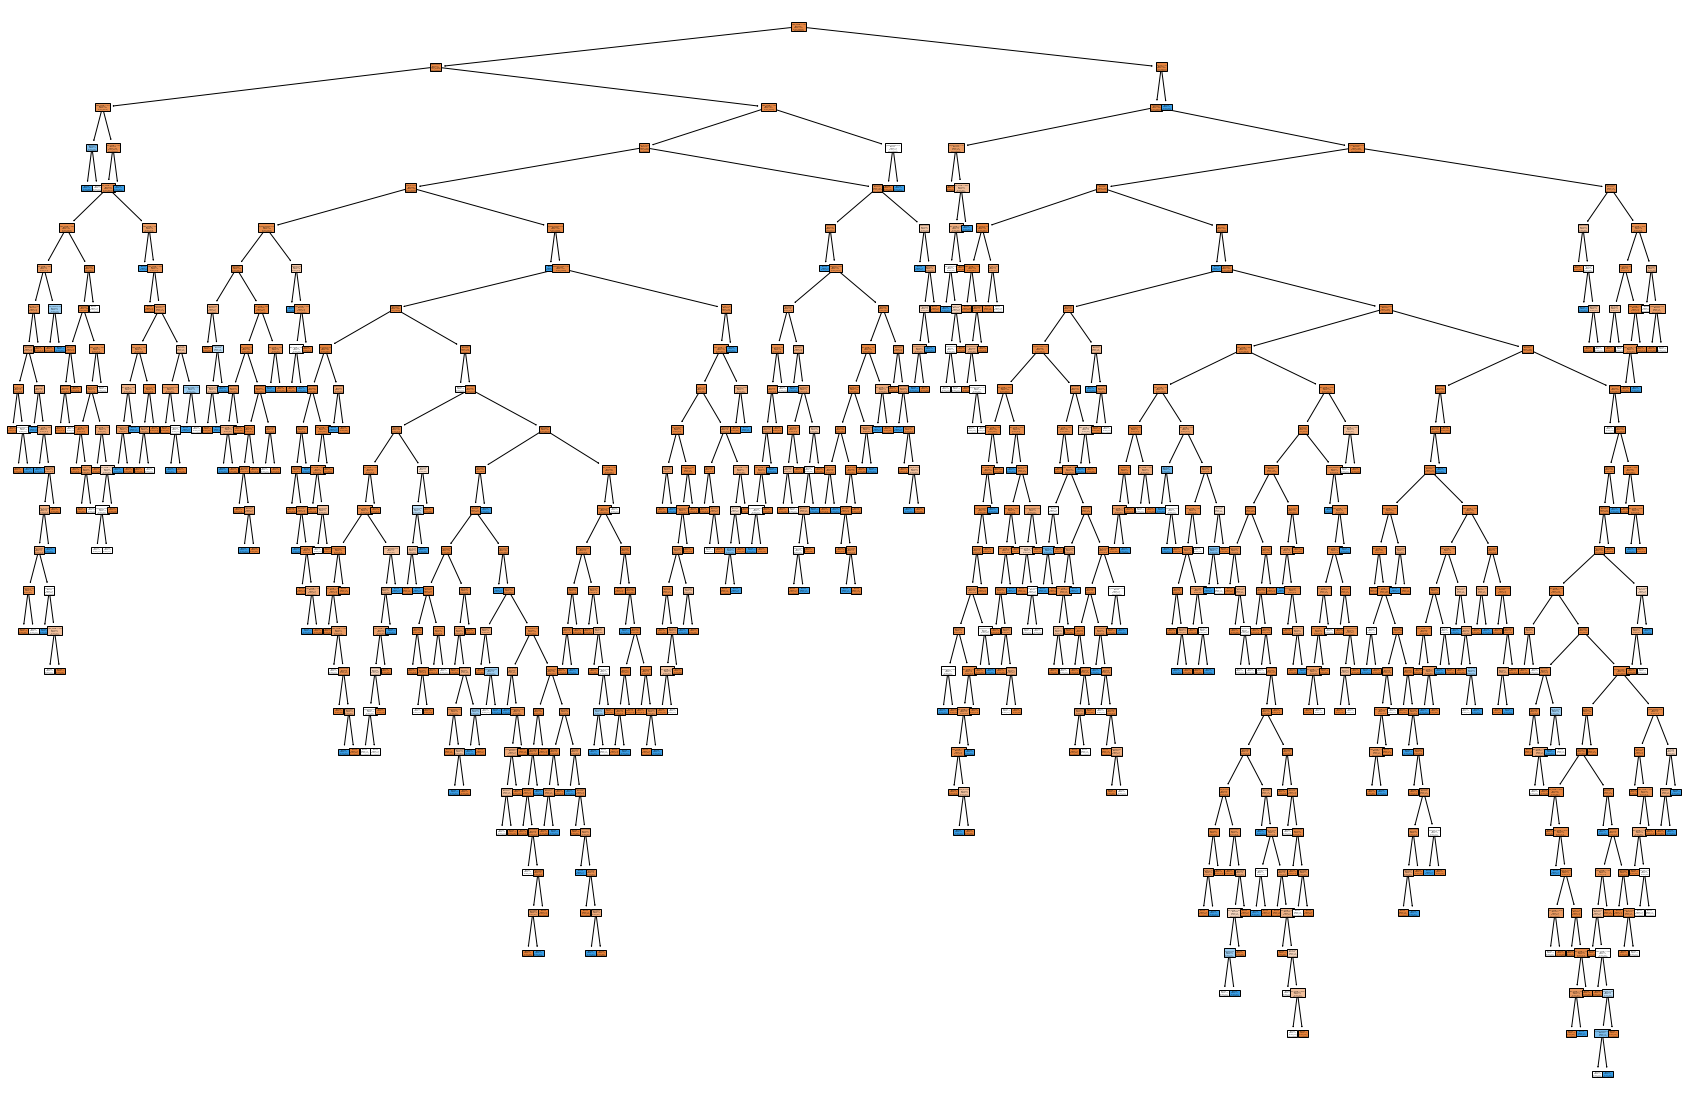

In [11]:
#3)
plt.figure(figsize=(30, 20))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_train.columns);

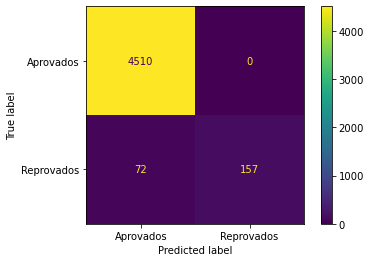

In [12]:
#4)
predictions_train = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions_train, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot();

In [13]:
#5)
ac = accuracy_score(y_train, predictions_train)
print(f"A acurácia na base de treinamento é {ac}.")

A acurácia na base de treinamento é 0.9848069212914117.


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [14]:
#1)
predictions_test = clf.predict(X_test)

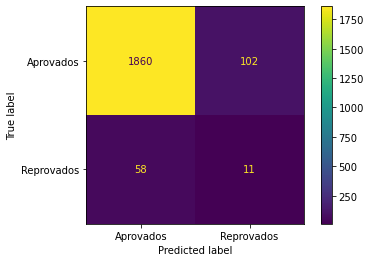

In [15]:
#2)
cm = confusion_matrix(y_test, predictions_test, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot();

In [16]:
#3)
ac = accuracy_score(y_test, predictions_test)
print(f"A acurácia na base de teste é {ac}.")

A acurácia na base de teste é 0.9212210733628754.


Pode-se observar que a acurácia na base de teste, em torno de 92,1%, é um pouco menor que a acurácia na base de treinamento, aproximadamente 98,5%, mas ambas são altas.

In [17]:
#4) Vamos treinar uma nova árvore com número mínimo de observações por folha
# de 5 e máximo de profundidade de 10.
clf = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state = 123)
clf = clf.fit(X_train,y_train)

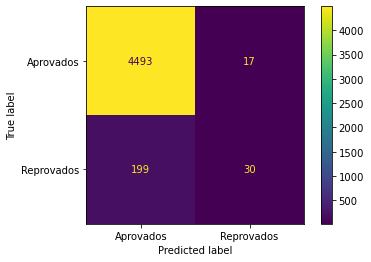

In [18]:
predictions_train = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions_train, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot();

Podemos interpretar a matriz de confusão da seguinte forma. Nosso modelo:

- Previu bons pagadores (aprovados) 4493 vezes corretamente;<br>
- Previu maus pagadores (reprovados) 30 vezes corretamente;<br>
- Previu bons pagadores (aprovados) 199 vezes incorretamente;<br>
- Previu maus pagadores (reprovados) 17 vezes incorretamente.

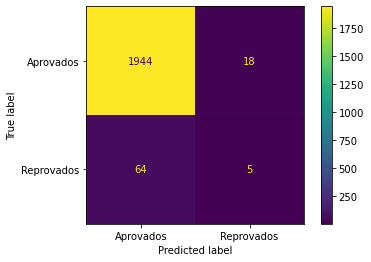

In [19]:
predictions_test = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions_test, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot();

In [20]:
total = np.sum(cm) #soma total da matriz
col = sum(cm[:, 1]) #soma da coluna de reprovados
prop = col / total
print(f"A proporção de proponentes classificados como 'maus' é de {prop*100:4.4}%.")

A proporção de proponentes classificados como 'maus' é de 1.132%.


In [22]:
#5) Vamos supor que todos os contratos são classificados como 'bons'.
y_test = np.array([0]*predictions_test.shape[0]) # criando apenas clientes bons
ac = accuracy_score(y_test, predictions_test) # cálculo da acurácia
print(f"A acurácia na base de teste é {ac}, se todos os clientes fossem 'bons'.")

A acurácia na base de teste é 0.9886755292959133, se todos os clientes fossem 'bons'.
